In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import odeint
import pandas as pd


from scipy.integrate import *
from numpy import *
from pylab import *
from scipy import *
import pandas as pd

In [2]:
#mu = 0.978 # prey growth rate (host growth) 

#mu_con =  0.528

#lam = 0.704 # rate of predator consumption/interception of prey 
            # (lysis rate) rate of production of predators when they have captured prey

#phi = 0.0000000382 # ability of predator to find, recognize, and 
                    # intercept prey (adsorption & initial replication; 
                    # transfer affinity, & clearance rate)
                    #encounter and capture 

#beta = 257.54 # amount of predator mass product as a result of 
                # consumption (typically in units of virus particles 
                # produced by lysis of host population) (not a rate) -burst size

#eps =  # amount of resource (prey debris) not consumed by predator- efficiency
 
#delta = 0.002 # predator death rate (viral decay)

#different units
    #mu = day^-1
    #lam = day^-1
    #phi = mL of predator^-1 day^-1
    #beta = viruses host^-1
    #eps = fmolC predator^-1
    #delta = day^-1

In [3]:
# time  step
#dt = 0.04

# time change (discrete time)
#T = 205 / 24.0
#t = np.linspace(0, T, 20000)
#t = np.linspace(0,T,int(T/dt))
#print(t)

# array  to store  the  solution
#S = np.zeros(len(t))
#I = np.zeros(len(t))
#V = np.zeros(len(t))

# define  initial  conditions, Euler’s method
#S[0] = 1500000.0
#I[0] = 0.0
#V[0] = 25500000.0

#y0 = S[0], I[0], V[0]
#print(y0)

In [4]:
# differential  equations
##dS = mu*S - phi*S*V #dS/dt
##dI = phi*S*V - lam*I #dI/dt
##dV = -phi*S*V + beta*lam*I - delta*V #dV/dt

def deriv(y, t, mu, lam, phi, beta, delta):
    S,I,V = y
    dSdt = (mu*S) - (phi*S*V)
    dIdt = (phi*S*V) - (lam*I)
    dVdt = (-phi*S*V) + (beta*lam*I) - (delta*V)
    return dSdt, dIdt, dVdt

# calling odeint

def integrate(params,inits,htimes,vtimes,forshow=False,delt=900.0 / 86400.0):
    days = amax(htimes)
    times = arange(0,days,delt)
    mu, lam, phi, beta, delta = exp(params[0]),exp(params[1]),exp(params[2]),exp(params[3]), exp(params[4]) # parameters
    u = odeint(deriv,inits,times,args=(mu, lam, phi, beta, delta))
    u = u.T
    if forshow==False:
        hinds = r_[[where(abs(a-times)==min(abs(a-times)))[0][0] for a in htimes]] # get time indices where host abundances were measured
        vinds = r_[[where(abs(a-times)==min(abs(a-times)))[0][0] for a in vtimes]] # same for viruses
        hnt = u[0][hinds] # host density
        inf = u[1][hinds]
        vnt = u[2][vinds] # virus density
    else:
        hnt = u[0]
        inf = u[1]
        vnt = u[2]
    return hnt,inf, vnt

#integ = odeint(deriv, y0, t, args=(mu, lam, phi, beta, delta))
#S,I,V = integ.T

#print(S)
#print(I)
#print(V)

In [5]:
#plt.plot(t,S, 'r--')
#plt.xlabel('Time', color = 'k')


#dS_csv = pd.read_csv('Baudoux_32_33_34_fig4b_host_control.txt',delimiter=',')
#print(dS_csv)
#unlogS = 10**(dS_csv['abundance'])
#print(unlogS)

#unlogS = (dS_csv['abundance'])
#dS_csv["time"] = dS_csv["time"]/24.0

#plt.plot(dS_csv["time"],unlogS,'or')
#plt.plot(t,S,'r')

In [6]:
#plt.plot(t,I, 'b')
#plt.xlabel('Time', color = 'k')

#dI_csv = pd.read_csv('Baudoux_32_33_34_fig4b_host_infected.txt',delimiter=',')
#print(dI_csv)


#unlogI = 10**(dI_csv['abundance'])
#print(unlogI)
#unlogI = (dI_csv['abundance'])

#dI_csv["time"] = dI_csv["time"]/24.0

#plt.plot(dI_csv['time'],unlogI,'ob')
#plt.plot(t,S+I,'b')

In [7]:
#plt.plot(t,V, 'g')
#plt.xlabel('Time', color = 'k')

#dV_csv = pd.read_csv('Baudoux_32_33_34_fig4a_viral_abundance.txt',delimiter=',')
#print(dV_csv)

#unlogV = 10**(dV_csv['virus'])
#print(unlogV)

#unlogV = (dV_csv['virus'])
#dV_csv["time"] = dV_csv["time"]/24.0

#plt.plot(dV_csv['time'],unlogV,'og')
#plt.plot(t,V,'g')

In [8]:
# load in the data

#host data

dS_csv = pd.read_csv('Sandaa_25_26_fig1a_host_control.txt',delimiter=',')
#print(dS_csv)
#unlogS = 10**(dS_csv['abundance'])
#print(unlogS)
unlogS = (dS_csv['abundance'])

#times, host = read.text("..."), unpack = True, ...

dS_csv["time"] = dS_csv["time"]/24.0

dI_csv = pd.read_csv('Sandaa_25_26_fig1a_host_infected.txt',delimiter=',')
#print(dI_csv)

#hhtemp = 10**(dI_csv['abundance'])
#print(unlogI)

hhtemp = (dI_csv['abundance'])
htimes = dI_csv["time"]/24.0
#print(htimes)

hhtempsd = ma.mean(hhtemp)*0.1 # these data did not come with standard deviations so i made them up


#virus data

dV_csv = pd.read_csv('Sandaa_25_26_fig1a_viral_abundance.txt',delimiter=',')
#print(dV_csv)

#vhtemp = 10**(dV_csv['virus'])
#print(unlogV)

vhtemp = (dV_csv['virus'])
vtimes = dV_csv["time"]/24.0

vhtempsd = ma.mean(vhtemp)*0.1 # these data did not come with standard deviations so i made them up


In [9]:
# generic arrays and optimization parameters


stds = zeros(5) + .05 # this controls how large the random steps are in the parameter search (see below)


opt = r_[[1,1,1,1,1]] # this allows you to control whether each parameter is imposed or fitted


names = ['muh','lam','phi','beta','delta'] # name each parameter array - useful for printing the output



nits = 1000 # number of iterations


pits = 100  # frequency with which to print results to the user about the progress of the algorithm


burnin = 100 # burnin period - don't 'store' the results for the first number of iterations as these are likely to be very far from the optimal ssolutions


In [10]:
# MODEL FITTING

## set up first guess params, MHA parameters, etc. 

mu = 0.424
lam = 2.693
phi = 0.00000000735
beta = 2396.59
delta = 1.5

# put in arrays for ease manipulating


params = r_[[mu,lam,phi,beta,delta]] # put inside a single array ready for the algorithm


params = log(params) # we do the parameter search in log space (I will explain later)


npars = params.shape[0] # number of parameters being searched through


# initial conditions


inits = r_[[hhtemp[0]+unlogS[0],0,vhtemp[0]]]

In [11]:
# first run just to get error


hnt,inf, vnt = integrate(params,inits,htimes,vtimes)


chi =   sum((hnt - hhtemp) ** 2 / (hhtempsd ** 2)) + sum((vnt - vhtemp) ** 2 / (vhtempsd ** 2))

In [12]:
# distribution arrays and acceptance ratios - these are containers to be added to

ar = 0.0


ars = r_[[]]


mus,lams,phis,betas,deltas= r_[[]],r_[[]],r_[[]],r_[[]],r_[[]]


pall = [mus,lams,phis,betas,deltas]

In [13]:
# now actually do the fitting

for it in arange(1,nits,1):
        parsnew = params + opt*normal(0,stds,npars) # this is where we randomly change the parameter values 
        sus,inf,vir = hhtemp[0],0,vhtemp[0] # have to reassign initial conditions because it's in a loop
        inits = r_[[sus,inf,vir]] # put initial conditions in an array
        hnt,inf,vnt = integrate(parsnew,inits,htimes,vtimes) # call the integration function
        chinew = sum((hnt - hhtemp) ** 2 / (hhtempsd ** 2)) +sum((vnt - vhtemp) ** 2 / (vhtempsd ** 2)) # calculate the error
        if exp(chi-chinew) > rand(): # KEY STEP
            chi = chinew 
            params = parsnew #  new parameters can be a little bit 'wrong'
            if it > burnin: # only store the parameters if you've gone through the burnin period
                pall = append(pall,params[:,None],1)
            ar = ar + 1.0 # acceptance ratio - I can explain this another time
        if (it % pits == 0):
            print(it,chi,ar/pits)
            ars = append(ars,ar/pits)
            ar = 0.0


100 34.6837864121383 0.34
200 32.698573316634985 0.17
300 29.571598640136166 0.17
400 30.472401647689125 0.13
500 32.04447917882778 0.14
600 29.45664714505208 0.12
700 28.18180380375101 0.12
800 28.75869733196637 0.2
900 26.652412209177243 0.14


In [14]:
# print output to screen


print('Optimal parameters')


pars = r_[[ mean(p) for p in pall]]


for (p,l) in zip(pars,names):
    print(l,'=',exp(p))


print (' ')


print('Standard deviations')


for (p,l) in zip(pall,names):
    print(l+'std','=',std(exp(p)))


print(' ')

Optimal parameters
muh = 0.5512282201060654
lam = 4.063662906584617
phi = 2.956925067257196e-09
beta = 4457.948337809917
delta = 1.2093166342432018
 
Standard deviations
muhstd = 0.10050688228392085
lamstd = 0.6245355107506451
phistd = 4.298604760810226e-10
betastd = 1001.2887231327195
deltastd = 0.21956449832577526
 


In [15]:
# redefine times for nicer looking plots

delt = 900.0 / 86400.0

ftimes = linspace(0,amax(htimes)/24.0,(amax(htimes) / delt)+1)*24.0

n = ftimes.shape[0]

/Users/kylabeth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """


In [16]:
# run again just for nicer looking plots (more even timesteps)


sus,inf,vir = hhtemp[0],0,vhtemp[0]


inits = r_[[sus,inf,vir]]


hnt,inf,vnt = integrate(pars,inits,ftimes,ftimes,forshow=True,delt=delt)

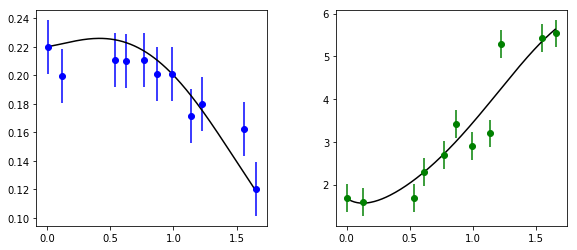

In [17]:
# set up figures

f1,ax1 = subplots(1,2,figsize=[9.5,4.0])
#f2,ax2 = subplots(4,1,figsize=[6,15])
f1.subplots_adjust(bottom=0.13,wspace=0.3,hspace=0.3)
#f2.subplots_adjust(hspace=0.45)


# plot

ax1[0].errorbar(htimes,hhtemp/1e+6,yerr=hhtempsd/1e+6,c='blue',fmt='o')
ax1[1].errorbar(vtimes,vhtemp/1e+8,yerr=vhtempsd/1e+8,c='green',fmt='o')
ax1[0].plot(ftimes,hnt/1e+6,c='black',lw=1.5,label='model fit')
ax1[1].plot(ftimes,vnt/1e+8,c='black',lw=1.5,label='model fit')



# high temp

#ax2[0].hist(exp(pall[1]),label='25 C',color='maroon')
#ax2[1].hist(exp(pall[0])*1e+9,label='25 C',color='maroon')
#ax2[2].hist(exp(pall[2]),label='25 C',color='maroon')
#ax2[3].hist(exp(pall[3]),label='25 C',color='maroon')